# London bike sharing dataset
The purpose is to try predict the future bike shares.
Metadata:
"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"}
"hum" - humidity in percentage
"wind_speed" - wind speed in km/h
"weather_code" - category of the weather
"is_holiday" - boolean field - 1 holiday / 0 non holiday
"is_weekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description: 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("london_merged.csv")

In [4]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [5]:
df.shape

(17414, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [8]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

The meaning of these columns appears to relate to weather data and possibly other contextual information. Here's a breakdown of each column:

1. `timestamp`: This likely represents the date and time of the observation or recording.
2. `cnt`: This could represent a count or quantity of something, potentially related to the number of occurrences, such as the number of people, vehicles, or events.
3. `t1`: This likely represents temperature (in degrees Celsius or Fahrenheit) at the time of observation.
4. `t2`: This could represent another temperature measurement, perhaps at a different location or elevation, or at a different time.
5. `hum`: This likely represents humidity, measured as a percentage.
6. `wind_speed`: This represents the speed of the wind, typically measured in units like kilometers per hour or miles per hour.
7. `weather_code`: This likely represents a code or identifier for the prevailing weather conditions at the time of observation (e.g., sunny, cloudy, rainy, etc.).
8. `is_holiday`: This column could be a binary indicator (0 or 1) representing whether the observation was made on a holiday.
9. `is_weekend`: Similar to `is_holiday`, this could be a binary indicator representing whether the observation was made on a weekend.
10. `season`: This likely represents the season of the year (e.g., winter, spring, summer, autumn).

Without further context, it's difficult to precisely determine the source or exact interpretation of these columns, but based on common conventions in weather data and contextual information, the meanings provided above are typical interpretations for each column.

In [9]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [10]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [11]:
df.apply(pd.Series.value_counts)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
2015-01-04 00:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04 01:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-05 01:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-05 03:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-05 04:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
88.5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
72.75,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
11.666666666666664,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
30.75,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [12]:
df.value_counts(dropna=False) 

timestamp            cnt   t1    t2    hum   wind_speed  weather_code  is_holiday  is_weekend  season
2015-01-04 00:00:00  182   3.0   2.0   93.0  6.0         3.0           0.0         1.0         3.0       1
2016-05-04 12:00:00  1482  17.0  17.0  39.0  17.5        1.0           0.0         0.0         0.0       1
2016-05-04 18:00:00  4133  16.5  16.5  26.0  17.5        1.0           0.0         0.0         0.0       1
2016-05-04 17:00:00  4312  17.0  17.0  38.0  17.0        1.0           0.0         0.0         0.0       1
2016-05-04 16:00:00  2292  17.5  17.5  39.5  13.0        1.0           0.0         0.0         0.0       1
                                                                                                        ..
2015-09-03 17:00:00  3430  15.5  15.5  57.0  16.0        2.0           0.0         0.0         2.0       1
2015-09-03 18:00:00  3075  15.0  15.0  59.0  10.0        2.0           0.0         0.0         2.0       1
2015-09-03 19:00:00  1855  14.0  14.0  65.

In [13]:
df=pd.DataFrame(df)

In [14]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [15]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [16]:
df=pd.DataFrame(df)

In [17]:
df


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [18]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

# Exploratory data analysis

In [19]:
df.weather_code.value_counts() # checking unique values with their count in weather column.

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [20]:
df.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [21]:
df.head(5) 

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [22]:
# Renaming the column names so that i can easily use them.


rename_cols={
'timestamp':'time',
'cnt':'count',
't1':'tempRealC',
't2':'tempFeelsC',
'hum':'humidity',
'wind_speed':'wind_speed_kmph',
'weather_code':'weather',
'is_holiday':'holiday',
'is_weekend':'weekend',
'season':'season'
}

df.rename(rename_cols, axis=1,inplace=True)

In [23]:
df.head(1) # all columns are renamed as we can see.

,time,count,tempRealC,tempFeelsC,humidity,wind_speed_kmph,weather,holiday,weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0


In [24]:
#changing humidity values to percentage (i.e. values from 0 to 1)

df.humidity= df.humidity/100

In [25]:
df.humidity

0        0.930
1        0.930
2        0.965
3        1.000
4        0.930
         ...  
17409    0.810
17410    0.810
17411    0.785
17412    0.760
17413    0.760
Name: humidity, Length: 17414, dtype: float64

In [26]:
#creating weather dictionary so we can use actual values instread of integers

weather_cols={'1.0':'Clear','2.0':'Scattered Clouds','3.0':'Broken Clouds','4.0':'Cloudy','7.0':'Light Rainfall','10.0':'Rain with Thunderstorm','26.0':'Snowfall'}

#creating season dictionary so we can use actual values instread of integers

season_cols={'0.0':'Spring','1.0':'Summer','2.0':'Fall','3.0':'Winter'}

In [27]:
df.season=df.season.astype('str') # changing datatype to str so we can use string values.
df.season=df.season.map(season_cols) #mapping integer value with their respective names (i.e. 1.0 is Summer) 
df.weather=df.weather.astype('str') # changing datatype to str so we can use string values.

df.weather=df.weather.map(weather_cols)  #mapping integer value with their respective names (i.e. 2.0 is Scattered Clouds) 

In [28]:
df.head(10)

,time,count,tempRealC,tempFeelsC,humidity,wind_speed_kmph,weather,holiday,weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken Clouds,0.0,1.0,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,Winter
5,2015-01-04 05:00:00,46,2.0,2.0,0.930,4.0,Clear,0.0,1.0,Winter
6,2015-01-04 06:00:00,51,1.0,-1.0,1.000,7.0,Cloudy,0.0,1.0,Winter
7,2015-01-04 07:00:00,75,1.0,-1.0,1.000,7.0,Cloudy,0.0,1.0,Winter
8,2015-01-04 08:00:00,131,1.5,-1.0,0.965,8.0,Cloudy,0.0,1.0,Winter
9,2015-01-04 09:00:00,301,2.0,-0.5,1.000,9.0,Broken Clouds,0.0,1.0,Winter


In [29]:
df.weather.value_counts()   # again checking unique values with their count in weather column.

weather
Clear                     6150
Scattered Clouds          4034
Broken Clouds             3551
Light Rainfall            2141
Cloudy                    1464
Snowfall                    60
Rain with Thunderstorm      14
Name: count, dtype: int64

In [30]:
df.season.value_counts()  # again checking unique values with their count in season column.

season
Spring    4394
Summer    4387
Winter    4330
Fall      4303
Name: count, dtype: int64

In [31]:
df

,time,count,tempRealC,tempFeelsC,humidity,wind_speed_kmph,weather,holiday,weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken Clouds,0.0,1.0,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,Winter
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken Clouds,0.0,0.0,Winter
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,Winter
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,Winter
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,Winter


<Axes: xlabel='season', ylabel='count'>

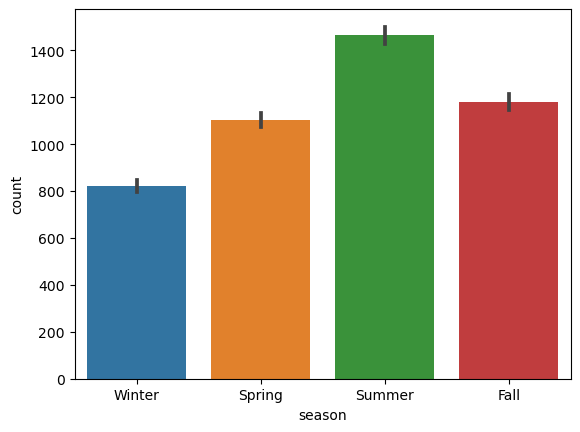

In [32]:
##Visulaization

sns.barplot(x='season', y='count', data=df)

# Most bike sharing happened in summer season 
# Best season for bike sharing is summer,fall and spring season 

<Axes: xlabel='count', ylabel='weather'>

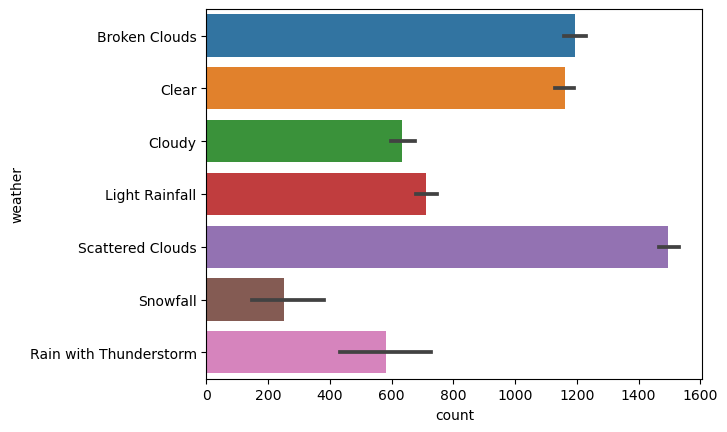

In [33]:
sns.barplot(x='count', y='weather', data=df, orient='h')

# Most bikes sharing happened in Scattered clouds
# Best 3 weather where Bike sharing happened in Scattered, Broken clouds or in Clean weather.

In [34]:
weekend_counts=df.weekend.value_counts()

In [35]:
weekend_counts

weekend
0.0    12444
1.0     4970
Name: count, dtype: int64

In [36]:
df.holiday.value_counts()

holiday
0.0    17030
1.0      384
Name: count, dtype: int64

In [37]:
df_counts=df.holiday.value_counts()

In [38]:
df_counts

holiday
0.0    17030
1.0      384
Name: count, dtype: int64

In [39]:
df.holiday=df.holiday.astype(int)

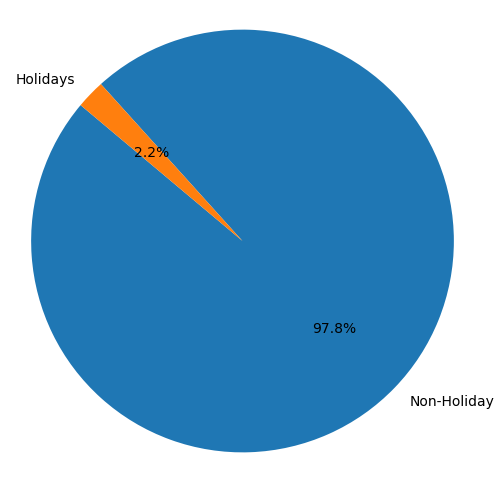

In [40]:

# Plot
plt.figure(figsize=(6, 6))
labels=['Non-Holiday','Holidays']
plt.pie(df_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


# Show plot
plt.show()

# we can see that Non holiday has more bike sharing

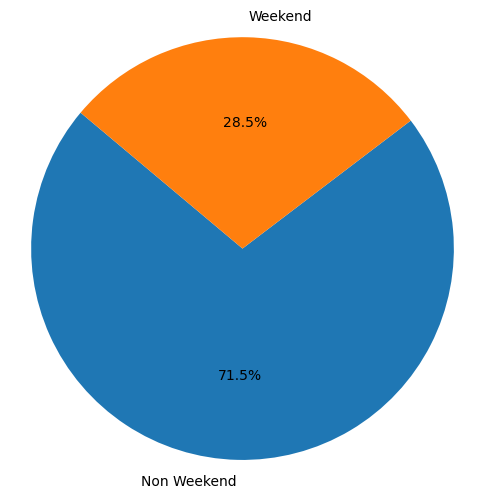

In [41]:

# Plot
plt.figure(figsize=(6, 6))
labels=['Non Weekend','Weekend']
plt.pie(weekend_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show plot
plt.show()

# we can see that Non weekends has more bike sharing

# In conclusion, analyzing trends in bike sharing reveals that the most activity occurs during the summer, fall, and spring seasons, particularly under scattered or broken cloud conditions. Interestingly, non-holidays and weekdays see higher usage, suggesting potential shifts in commuting habits. These insights may inform future bike-share program planning and resource allocation..